In [1]:
# The code was removed by Watson Studio for sharing.

In [2]:
import pandas as pd 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

affiliation_url = "https://en.wikipedia.org/wiki/Political_party_strength_in_U.S._states"

affiliation_df = pd.read_html(affiliation_url)

party_df = affiliation_df[3]

party2_df = party_df[['State','Partisan split (as of 2018']]

party2_df.head()

,State,Partisan split (as of 2018
0,Alabama,Republican52–35[a]
1,Alaska,Republican24.3–13.3[c][9]
2,Arizona,Republican34.9–32.5[c][10]
3,Arkansas,Republican48–35[a]
4,California,Democratic45.3–23.9[c][11]


In [3]:
party2_df['Republican'] = party2_df['Partisan split (as of 2018'].str.contains('Republican')
party2_df['Democratic'] = party2_df['Partisan split (as of 2018'].str.contains('Democratic')
#party2_df['Republican2'] = 1 if (party2_df['Republican'] == True) else 0 
party2_df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,State,Partisan split (as of 2018,Republican,Democratic
0,Alabama,Republican52–35[a],True,False
1,Alaska,Republican24.3–13.3[c][9],True,False
2,Arizona,Republican34.9–32.5[c][10],True,False
3,Arkansas,Republican48–35[a],True,False
4,California,Democratic45.3–23.9[c][11],False,True


In [4]:
party2_df['Republican'] = party2_df['Republican'].astype('int')
party2_df['Democratic'] = party2_df['Democratic'].astype('int')
#party2_df.replace({'Partisan split (as of 2018': r'\[.*\]'}, {'Partisan split (as of 2018': ''}, regex=True)
party2_df['Ratio']=party2_df['Partisan split (as of 2018'].replace(regex="\[.*\]", value='').replace(regex="Republican",value="").replace(regex='Democratic',value='').replace(regex="–",value="-")
party2_df

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,State,Partisan split (as of 2018,Republican,Democratic,Ratio
0,Alabama,Republican52–35[a],1,0,52-35
1,Alaska,Republican24.3–13.3[c][9],1,0,24.3-13.3
2,Arizona,Republican34.9–32.5[c][10],1,0,34.9-32.5
3,Arkansas,Republican48–35[a],1,0,48-35
4,California,Democratic45.3–23.9[c][11],0,1,45.3-23.9
5,Colorado,Democratic30.4–28.0[c][12],0,1,30.4-28.0
6,Connecticut,Democratic36.6–21.0[c][13],0,1,36.6-21.0
7,Delaware,Democratic47.6–27.7[c][14],0,1,47.6-27.7
8,Florida,Democratic37.4–35.3[c][15],0,1,37.4-35.3
9,Georgia,Democratic43–42[a],0,1,43-42


In [5]:
party2_df['Lead Ratio'] = party2_df['Ratio'].str.extract('(.*)\\-')
party2_df['Secondary Ratio'] = party2_df['Ratio'].str.extract('\\-(.*$)')
#party_df.to_csv(r'party.csv')






/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [6]:
party2_df.loc[party2_df['Republican']==1,'Republican Ratio']=party2_df.loc[party2_df['Republican']==1,'Lead Ratio']
party2_df.loc[party2_df['Republican']==1,'Democratic Ratio']=party2_df.loc[party2_df['Republican']==1,'Secondary Ratio']
party2_df.loc[party2_df['Democratic']==1,'Republican Ratio']=party2_df.loc[party2_df['Democratic']==1,'Secondary Ratio']
party2_df.loc[party2_df['Democratic']==1,'Democratic Ratio']=party2_df.loc[party2_df['Democratic']==1,'Lead Ratio']
party2_df.loc[48,'Republican Ratio'] = 43
party2_df.loc[48,'Democratic Ratio'] = 43
party2_df.set_index('State',inplace=True)
party2_df

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Partisan split (as of 2018,Republican,Democratic,Ratio,Lead Ratio,Secondary Ratio,Republican Ratio,Democratic Ratio
State,,,,,,,,
Alabama,Republican52–35[a],1,0,52-35,52,35,52,35
Alaska,Republican24.3–13.3[c][9],1,0,24.3-13.3,24.3,13.3,24.3,13.3
Arizona,Republican34.9–32.5[c][10],1,0,34.9-32.5,34.9,32.5,34.9,32.5
Arkansas,Republican48–35[a],1,0,48-35,48,35,48,35
California,Democratic45.3–23.9[c][11],0,1,45.3-23.9,45.3,23.9,23.9,45.3
Colorado,Democratic30.4–28.0[c][12],0,1,30.4-28.0,30.4,28.0,28.0,30.4
Connecticut,Democratic36.6–21.0[c][13],0,1,36.6-21.0,36.6,21.0,21.0,36.6
Delaware,Democratic47.6–27.7[c][14],0,1,47.6-27.7,47.6,27.7,27.7,47.6
Florida,Democratic37.4–35.3[c][15],0,1,37.4-35.3,37.4,35.3,35.3,37.4


In [7]:
#from project_lib import Project
#project = Project(None,"9a5c4fa9-6563-451e-9423-8a4851f5c2c1","p-085451216b03e466ec7cce5b04375d8f6aa5d3f0")
#project.save_data(file_name = "party.csv",data = party2_df.to_csv(index=False))

In [8]:
covid_df = pd.read_csv("https://github.com/KFFData/COVID-19-Data/raw/2937bd8d74425b842146c96b039aad45060f8b51/State%20Trend%20Data/State_Trend_Data.csv")
covid_df.head()
covid_df['Date']=pd.to_datetime(covid_df['Date'])
covid_df.dtypes
covid_df

,State,Date,CumulativeCases,CumulativeDeaths,CumulativeTests,CumulativePositives,CurrentHospitalizations,CasesDailyChange,DeathsDailyChange,TestsDailyChange,PositivesDailyChange,Rolling Avg Change in Cases (7 Days),Rolling Avg Change in Deaths (7 Days),Rolling Avg Change in Tests (7 Days),Rolling Avg Change in Positives (7 Days),Rolling Avg Change in Current Hospitalizations (7 Days),Pct Change in Cases (2 Wks - Rolling),Pct Change in Cases (7 Days - Rolling),Pct Change in Deaths (2 Wks - Rolling),Pct Change in Deaths (7 Days - Rolling),Pct Change in Tests (2 Wks - Rolling),Pct Change in Tests (7 Days - Rolling),Pct Change in Positivity Rate (2 Wks - Rolling),Pct Change in Positivity Rate (7 Days - Rolling),Pct Change in Current Hospitalizations (2 Wks),Pct Change in Current Hospitalizations (7 Days),Change in Tests (7 Days) Over Pop,Positivity Rate (7 Days - Rolling)
0,Alabama,2020-03-01,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,2020-03-02,0,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,2020-03-03,0,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alabama,2020-03-04,0,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alabama,2020-03-05,0,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Alabama,2020-03-06,0,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Alabama,2020-03-07,0,0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Alabama,2020-03-08,0,0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Alabama,2020-03-09,0,0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Alabama,2020-03-10,0,0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
covid_df.set_index(['State','Date'],inplace=True)


In [10]:
covid_df.head()

CumulativeCases  CumulativeDeaths  CumulativeTests  \
State   Date                                                             
Alabama 2020-03-01                0                 0              NaN   
        2020-03-02                0                 0              NaN   
        2020-03-03                0                 0              NaN   
        2020-03-04                0                 0              NaN   
        2020-03-05                0                 0              NaN   

                    CumulativePositives  CurrentHospitalizations  \
State   Date                                                       
Alabama 2020-03-01                  NaN                      NaN   
        2020-03-02                  NaN                      NaN   
        2020-03-03                  NaN                      NaN   
        2020-03-04                  NaN                      NaN   
        2020-03-05                  NaN                      NaN   

                    CasesDailyChange  DeathsDailyChange  TestsDailyChange  \
State   Date                                                                
Alabama 2020-03-01               NaN                NaN               NaN   
        2020-03-02               0.0                0.0               NaN   
        2020-03-03               0.0                0.0               NaN   
        2020-03-04               0.0                0.0               NaN   
        2020-03-05               0.0                0.0               NaN   

                    PositivesDailyChange  \
State   Date                               
Alabama 2020-03-01                   NaN   
        2020-03-02                   NaN   
        2020-03-03                   NaN   
        2020-03-04                   NaN   
        2020-03-05                   NaN   

                    Rolling Avg Change in Cases (7 Days)  \
State   Date                                               
Alabama 2020-03-01                                   NaN   
        2020-03-02                                   NaN   
        2020-03-03                                   NaN   
        2020-03-04                                   NaN   
        2020-03-05                                   NaN   

                    Rolling Avg Change in Deaths (7 Days)  \
State   Date                                                
Alabama 2020-03-01                                    NaN   
        2020-03-02                                    NaN   
        2020-03-03                                    NaN   
        2020-03-04                                    NaN   
        2020-03-05                                    NaN   

                    Rolling Avg Change in Tests (7 Days)  \
State   Date                                               
Alabama 2020-03-01                                   NaN   
        2020-03-02                                   NaN   
        2020-03-03                                   NaN   
        2020-03-04                                   NaN   
        2020-03-05                                   NaN   

                    Rolling Avg Change in Positives (7 Days)  \
State   Date                                                   
Alabama 2020-03-01                                       NaN   
        2020-03-02                                       NaN   
        2020-03-03                                       NaN   
        2020-03-04                                       NaN   
        2020-03-05                                       NaN   

                    Rolling Avg Change in Current Hospitalizations (7 Days)  \
State   Date                                                                  
Alabama 2020-03-01                                                NaN         
        2020-03-02                                                NaN         
        2020-03-03                                                NaN         
        2020-03-04                                           

In [11]:
#covid_df['rdeaths'] = covid_df['DeathsDailyChange'].astype('float') * party2_df['Republican Ratio'].astype('float') * 0.01
#covid_df['ddeaths'] = covid_df['DeathsDailyChange'].astype('float') * party2_df['Democratic Ratio'].astype('float') * 0.01
covid_df['rcases'] = covid_df['CasesDailyChange'].astype('float') * party2_df['Republican Ratio'].astype('float') * 0.01
covid_df['dcases'] = covid_df['CasesDailyChange'].astype('float') * party2_df['Democratic Ratio'].astype('float') * 0.01
cases_df = covid_df[['rcases','dcases']]
cases_df

rcases   dcases
State         Date                        
Alabama       2020-03-01      NaN      NaN
              2020-03-02    0.000    0.000
              2020-03-03    0.000    0.000
              2020-03-04    0.000    0.000
              2020-03-05    0.000    0.000
              2020-03-06    0.000    0.000
              2020-03-07    0.000    0.000
              2020-03-08    0.000    0.000
              2020-03-09    0.000    0.000
              2020-03-10    0.000    0.000
              2020-03-11    0.000    0.000
              2020-03-12    0.000    0.000
              2020-03-13    2.600    1.750
              2020-03-14    1.040    0.700
              2020-03-15    2.080    1.400
              2020-03-16    9.360    6.300
              2020-03-17    5.200    3.500
              2020-03-18    6.240    4.200
              2020-03-19   14.040    9.450
              2020-03-20   14.560    9.800
              2020-03-21   13.000    8.750
              2020-03-22   13.520    9.100
              2020-03-23   20.280   13.650
              2020-03-24   23.920   16.100
              2020-03-25   72.280   48.650
              2020-03-26   70.720   47.600
              2020-03-27   36.400   24.500
              2020-03-28   55.640   37.450
              2020-03-29   68.120   45.850
              2020-03-30   38.480   25.900
              2020-03-31   45.760   30.800
              2020-04-01   37.960   25.550
              2020-04-02   89.960   60.550
              2020-04-03  136.240   91.700
              2020-04-04   61.880   41.650
              2020-04-05   78.520   52.850
              2020-04-06   97.240   65.450
              2020-04-07  112.840   75.950
              2020-04-08   82.680   55.650
              2020-04-09  195.000  131.250
              2020-04-10  126.880   85.400
              2020-04-11  140.400   94.500
              2020-04-12  179.920  121.100
              2020-04-13   88.920   59.850
              2020-04-14  113.880   76.650
              2020-04-15   63.440   42.700
              2020-04-16  140.400   94.500
              2020-04-17  117.520   79.100
              2020-04-18   73.320   49.350
              2020-04-19   91.520   61.600
              2020-04-20   99.320   66.850
              2020-04-21  123.760   83.300
              2020-04-22  143.520   96.600
              2020-04-23  124.280   83.650
              2020-04-24  100.880   67.900
              2020-04-25    0.000    0.000
              2020-04-26  205.400  138.250
              2020-04-27   61.360   41.300
              2020-04-28  109.720   73.850
              2020-04-29   84.240   56.700
              2020-04-30   91.520   61.600
              2020-05-01  107.120   72.100
              2020-05-02  164.840  110.950
              2020-05-03  144.040   96.950
              2020-05-04  116.480   78.400
              2020-05-05  169.000  113.750
              2020-05-06  132.080   88.900
              2020-05-07  184.600  124.250
              2020-05-08  176.280  118.650
              2020-05-09  147.160   99.050
              2020-05-10  114.920   77.350
              2020-05-11  143.000   96.250
              2020-05-12  156.000  105.000
              2020-05-13  122.720   82.600
              2020-05-14  208.520  140.350
              2020-05-15  141.440   95.200
              2020-05-16  156.520  105.350
              2020-05-17   50.440   33.950
              2020-05-18  163.800  110.250
              2020-05-19  150.800  101.500
              2020-05-20  351.520  236.600
              2020-05-21  122.720   82.600
              2020-05-22  198.640  133.700
              2020-05-23  232.440  156.450
              2020-05-24  187.720  126.350
              2020-05-25  264.160  177.800
              2020-05-26  345.280  232.400
              2020-05-27  198.640  133.700
              2020-05-28  258.960  174.300
              2020-05-29  260.520  175.350
              2020-05-30  170.560  114.800
              2020-05-31  30

In [12]:
import numpy as np
#table = pd.pivot_table(key_cols, values=['rdeaths','ddeaths'], index='Date',
#                    aggfunc=np.sum)
cases_pivot = pd.pivot_table(cases_df, values=['rcases','dcases'], index='Date', aggfunc=np.sum)


In [72]:

cases_pivot['Rolling Democratic Cases']=cases_pivot.iloc[:,0].rolling(window=7).mean()
cases_pivot['Rolling Republican Cases']=cases_pivot.iloc[:,1].rolling(window=7).mean()
cases_pivot['Republican Ratio']=(cases_pivot['Rolling Republican Cases'] / (cases_pivot['Rolling Republican Cases'] + cases_pivot['Rolling Democratic Cases']) * 100)

cases_pivot

,dcases,rcases,Rolling Democratic Cases,Rolling Republican Cases,Republican Ratio
Date,,,,,
2020-03-01,0.000,0.000,NaN,NaN,NaN
2020-03-02,10.345,6.423,NaN,NaN,NaN
2020-03-03,9.061,6.219,NaN,NaN,NaN
2020-03-04,15.084,8.561,NaN,NaN,NaN
2020-03-05,32.968,21.058,NaN,NaN,NaN
2020-03-06,20.907,13.620,NaN,NaN,NaN
2020-03-07,53.892,32.048,20.322429,12.561286,38.199109
2020-03-08,50.301,30.089,27.508286,16.859714,37.999717
2020-03-09,30.896,19.323,30.444143,18.702571,38.054571


<Figure size 432x288 with 0 Axes>

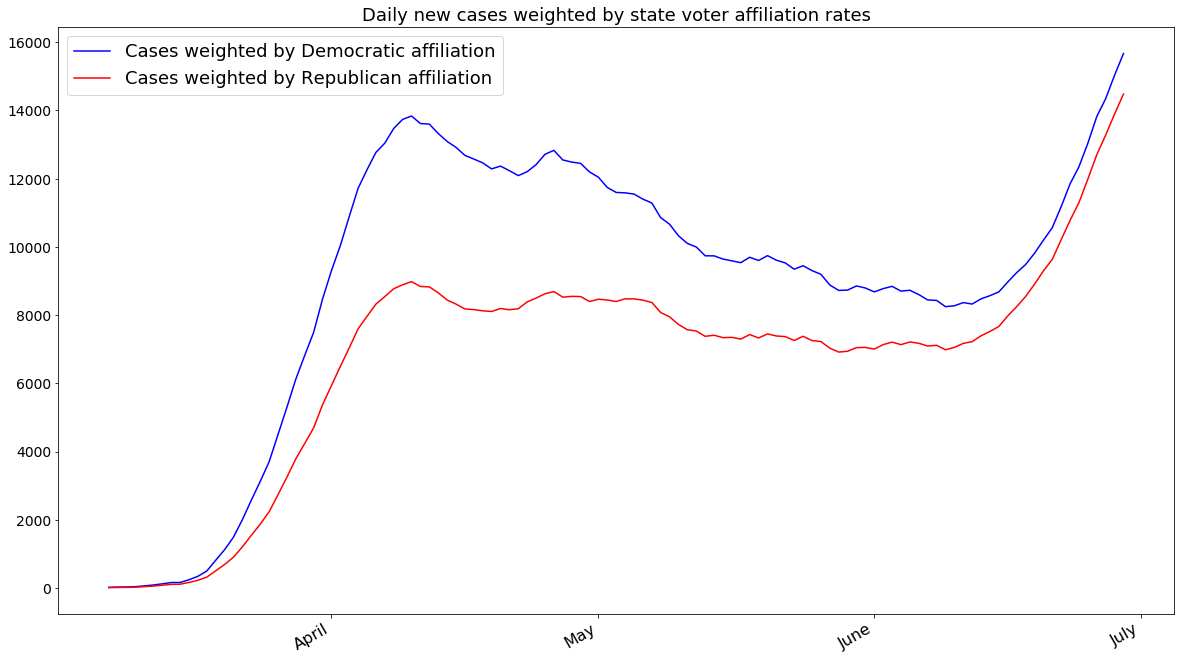

In [107]:
#table[['Rolling Democratic','Rolling Republican']].plot.line()
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.clf()
#plt.figure(figsize=(12,20))
#ax1 = cases_pivot[['Rolling Democratic Cases','Rolling Republican Cases']].plot.line(color=['blue','red'],legend=['Cases weighted by Democratic affiliation','Cases weighted by Republican affiliation'])
#fig = plt.gcf()


#ax2 = cases_pivot[['Republican Ratio']].plot.line()

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
months_fmt = mdates.DateFormatter('%B')

fig, ax = plt.subplots()
ax.plot(cases_pivot.index, cases_pivot['Rolling Democratic Cases'], label='Cases weighted by Democratic affiliation',color='blue')
ax.plot(cases_pivot.index, cases_pivot['Rolling Republican Cases'], label='Cases weighted by Republican affiliation',color='red')
# format the ticks
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)
ax.labelsize=25
ax.legend(fontsize=18)
fig.set_size_inches(20,12)

plt.yticks(fontsize=14)
plt.xticks(rotation=0,fontsize=16)
plt.title("Daily new cases weighted by state voter affiliation rates",fontsize=18)

fig.autofmt_xdate()
plt.show()

#leg = ax.legend();


<Figure size 432x288 with 0 Axes>

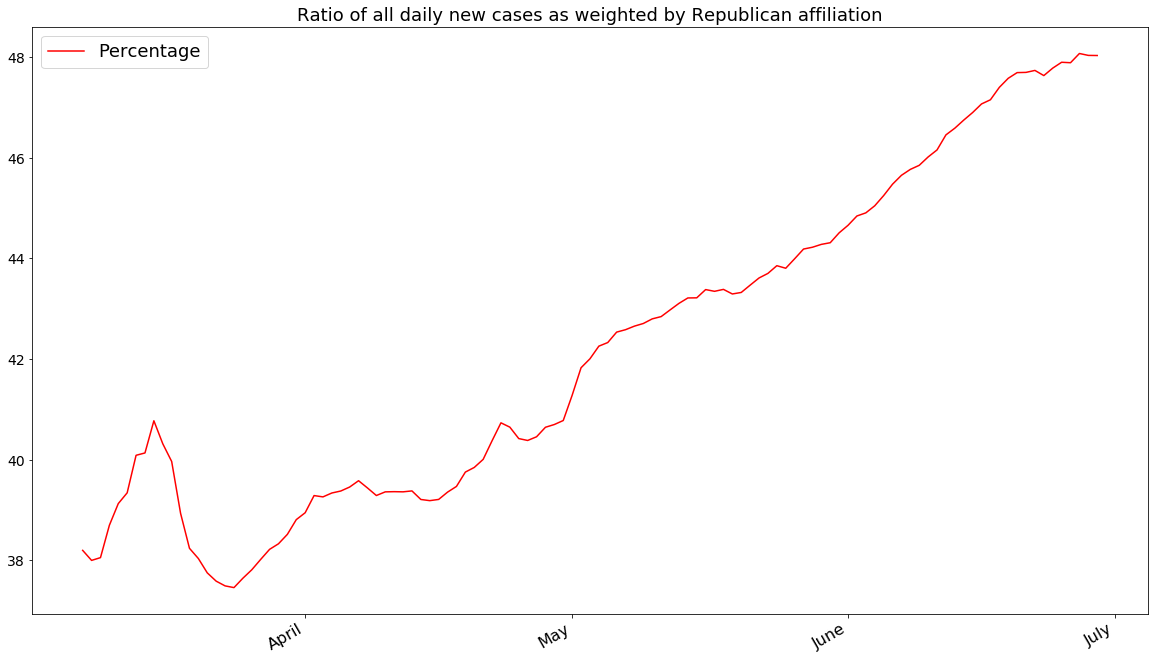

In [106]:
plt.clf()
#plt.figure(figsize=(12,20))
#ax1 = cases_pivot[['Rolling Democratic Cases','Rolling Republican Cases']].plot.line(color=['blue','red'],legend=['Cases weighted by Democratic affiliation','Cases weighted by Republican affiliation'])
#fig = plt.gcf()


#ax2 = cases_pivot[['Republican Ratio']].plot.line()

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
months_fmt = mdates.DateFormatter('%B')

fig, ax = plt.subplots()
ax.plot(cases_pivot.index, cases_pivot['Republican Ratio'], label='Percentage',color='red')
#ax.plot(cases_pivot.index, cases_pivot['Rolling Republican Cases'], label='Cases weighted by Democratic affiliation',color='red')
# format the ticks
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)
ax.labelsize=25
ax.legend(fontsize=18)
fig.set_size_inches(20,12)
plt.yticks(fontsize=14)
plt.xticks(rotation=0,fontsize=16)
plt.title("Ratio of all daily new cases as weighted by Republican affiliation",fontsize=18)

fig.autofmt_xdate()
plt.show()

In [19]:
import requests

url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'
r = requests.get(url)
state_geo = r.text
state_geo

'{"type":"FeatureCollection","features":[\n{"type":"Feature","id":"AL","properties":{"name":"Alabama"},"geometry":{"type":"Polygon","coordinates":[[[-87.359296,35.00118],[-85.606675,34.984749],[-85.431413,34.124869],[-85.184951,32.859696],[-85.069935,32.580372],[-84.960397,32.421541],[-85.004212,32.322956],[-84.889196,32.262709],[-85.058981,32.13674],[-85.053504,32.01077],[-85.141136,31.840985],[-85.042551,31.539753],[-85.113751,31.27686],[-85.004212,31.003013],[-85.497137,30.997536],[-87.600282,30.997536],[-87.633143,30.86609],[-87.408589,30.674397],[-87.446927,30.510088],[-87.37025,30.427934],[-87.518128,30.280057],[-87.655051,30.247195],[-87.90699,30.411504],[-87.934375,30.657966],[-88.011052,30.685351],[-88.10416,30.499135],[-88.137022,30.318396],[-88.394438,30.367688],[-88.471115,31.895754],[-88.241084,33.796253],[-88.098683,34.891641],[-88.202745,34.995703],[-87.359296,35.00118]]]}},\n{"type":"Feature","id":"AK","properties":{"name":"Alaska"},"geometry":{"type":"MultiPolygon","co

In [35]:
party2_df['State']=party2_df.index    
party2_df['Republican Ratio'] = party2_df['Republican Ratio'].astype('float')
party2_df

,Partisan split (as of 2018,Republican,Democratic,Ratio,Lead Ratio,Secondary Ratio,Republican Ratio,Democratic Ratio,State
State,,,,,,,,,
Alabama,Republican52–35[a],1,0,52-35,52,35,52.0,35,Alabama
Alaska,Republican24.3–13.3[c][9],1,0,24.3-13.3,24.3,13.3,24.3,13.3,Alaska
Arizona,Republican34.9–32.5[c][10],1,0,34.9-32.5,34.9,32.5,34.9,32.5,Arizona
Arkansas,Republican48–35[a],1,0,48-35,48,35,48.0,35,Arkansas
California,Democratic45.3–23.9[c][11],0,1,45.3-23.9,45.3,23.9,23.9,45.3,California
Colorado,Democratic30.4–28.0[c][12],0,1,30.4-28.0,30.4,28.0,28.0,30.4,Colorado
Connecticut,Democratic36.6–21.0[c][13],0,1,36.6-21.0,36.6,21.0,21.0,36.6,Connecticut
Delaware,Democratic47.6–27.7[c][14],0,1,47.6-27.7,47.6,27.7,27.7,47.6,Delaware
Florida,Democratic37.4–35.3[c][15],0,1,37.4-35.3,37.4,35.3,35.3,37.4,Florida


In [50]:
#!pip install folium
# Import libraries
import pandas as pd
import folium
 

# Initialize the map:
m = folium.Map(location=[37, -102], zoom_start=5)

 
# Add the color for the chloropleth:
m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=party2_df,
 columns=['State', 'Republican Ratio'],
 key_on='feature.properties.name',
 fill_color='OrRd',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Percentage of Republican voters'
)
folium.LayerControl().add_to(m)
m 
# Save to html
#m.save('#292_folium_chloropleth_USA1.html')